In [1]:
import json
from IPython.core.display import Image, display

with open('/home/xilini/par-gen/01-par-gen/data/dataset_paragraphs_v1.json', 'r') as p:
    paragraphs = json.load(p)['images']
val_paragraphs = [elem for elem in paragraphs if elem['split'] == 'test']

def show_image(image_id):
    vis_data_basepath = '/home/xilini/vis-data/'
    filename = str(image_id) + '.jpg'
    print(filename)
    for item in val_paragraphs:
        if filename == item['filename']:
            return vis_data_basepath + item['filepath'] + '/' + item['filename']
    return 'Not Found'

beam_nomulti_noatt = './scores/lang-att-beam2-30k.json'
beam_multi_noatt = './scores/lang+att-beam2-30k.json'
beam_nomulti_att = './scores/lang-att+beam2-30k.json'
beam_multi_att = './scores/lang+att+beam2-30k.json'

with open(beam_nomulti_noatt, 'r') as f:
    beam_nomulti_noatt = json.load(f)
with open(beam_multi_noatt, 'r') as k:
    beam_multi_noatt = json.load(k)
with open(beam_nomulti_att, 'r') as l:
    beam_nomulti_att = json.load(l)
with open(beam_multi_att, 'r') as p:
    beam_multi_att = json.load(p)
    

In [31]:
sample_id = 2368945

2368945.jpg


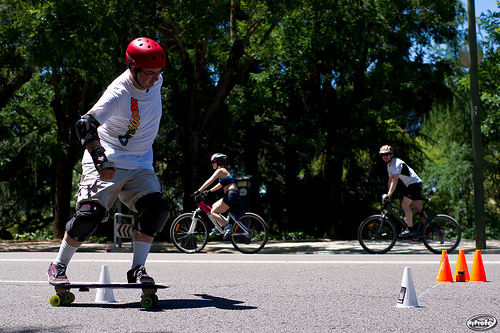

In [32]:
display(Image(show_image(2368945),
                  width=300, unconfined=False))

In [33]:
print('GROUND TRUTH')
for item in beam_nomulti_noatt:
    if item['image_id'] == sample_id:
        print(item['references'])

GROUND TRUTH
a man in a white shirt and white shorts is wearing a red helmet. he is on top of a black skateboard with green wheels. there are two people riding bikes behind him. there are orange and white small cones on the ground in front of the skateboarder.


In [34]:
# BASELINE (ONLY VISION, NO ATTENTION)
for item in beam_nomulti_noatt:
    if item['image_id'] == sample_id:
        print(item['hypotheses'])
# not connected, just things in an image, one after another

a man in a blue shirt and black pants is riding a skateboard. he is wearing a black helmet , and a black helmet. the man has a black helmet on his back. there is a person in the background.


In [35]:
# WITH BACKGROUND, NO ATTENTION
# lots of spatial descriptions
for item in beam_multi_noatt:
    if item['image_id'] == sample_id:
        print(item['hypotheses'])
# focuses on particular objects too much, does not take into account many other objects

a group of people are riding on the street. the man is riding a skateboard. the men are wearing a black shirt. the man on the right is wearing a black shirt and black pants.


In [36]:
# BASELINE, WITH ATTENTION
for item in beam_nomulti_att:
    if item['image_id'] == sample_id:
        print(item['hypotheses'])
# tries to capture objects and describe them one after another in a sensible way (?)

there is a man riding on a skateboard. the man on the right is wearing a black helmet. the man is wearing a helmet on his back. the man on the left is wearing a black jacket.


In [37]:
# WITH BACKGROUND + WITH ATTENTION
for item in beam_multi_att:
    if item['image_id'] == sample_id:
        print(item['hypotheses'])
# attention overpowers multimodality, hurting its influence. Attention seems to elicit
# very similar topics without diversity, strongly attending on them only.

a man in a blue shirt is riding a skateboard. the man on the skateboard is wearing a white helmet. the man on the skateboard is wearing a blue shirt and a blue shirt. there are trees in front of the people.


In [ ]:
# some interesting examples for beam without length normalisation
#2406453 - a goood example of how model evolves (parking meter)
#2406466 - no connectivity in the baseline example (?)
#2368945
#2417656 (?)
#2400379 - good example of MORE GROUNDED description.
#2373764
#2357484 (?)
#2380019 - a good example
#2359601 - another good example
#2343710 - yet another good example of the fact that multimodal input assists for topic diversity

2368945.jpg


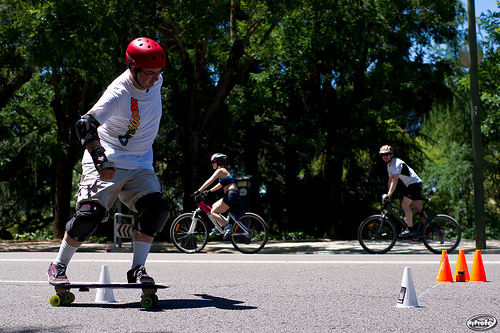

In [29]:
display(Image(show_image(2368945),
                  width=300, unconfined=False))

In [ ]:
# how to measure the fact that some descriptions describe same objects al lthe time?
# similarity between sentences in the paragraph!
# cosine similarity?

# maybe, number of overlapping nouns between sentences also?
# ok, first: number of overlapping nouns between paragrph sentences.
# for multi only, this number should be the smallest...
# then, cosine similarity between paragraph sentences

# how to measure connectivity between sentences?
# attention maps. But we do not have attention for non-attention models....
# discourse connectives (?) coreferences, etc...
# we can't get connectivity in non-attentive models that simply, because they have no attention.
# and affine matrix is a multiplication.
# well, we can compare connectivity with some ground-truth objects?
# take bounding boxes from VG, connect them with nouns, and look at the model's attention
# this is because we do not have attention for 2 models, we need to use something else.
# some number would be nice here (not only visualisations)
# number of sequentially mentioned objects (From sentence to sentence):
# coreference......


# better automatic scores with length control, but paragraphs are less diverse as CIDEr suggests
# CIDEr needs diverse grounded n-grams.
# for BLEU scores - it is beneficial. for CIDEr - not.
# n-gram penalty, n-best rescoring methods - some of these might be helpful.